In [1]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

%matplotlib inline
label_size = 22 + 2
tick_size = 20 + 2
title_size = 24 + 2
legend_size = 18

plt.rcParams["font.family"] = "Palatino"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [2]:
mode = 'drag_and_drop'

# Demo Time

# Time per question

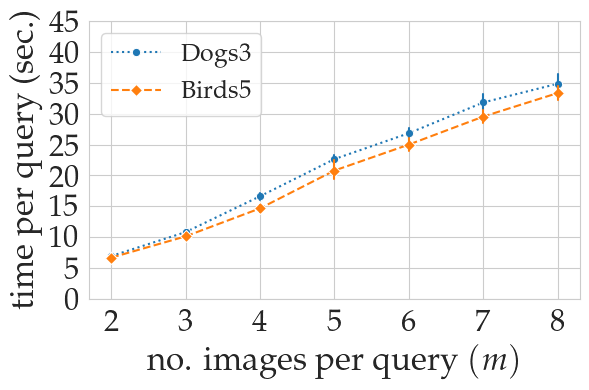

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

time_per_question_df = pd.read_csv(f"./csv/time_per_question_dogs3_{mode}.csv")
sns.lineplot(data=time_per_question_df, x="num_images_per_question", y="time_per_question", err_style="bars", ax=ax, markers=True, marker='o', label='Dogs3', linestyle='dotted')
time_per_question_df = pd.read_csv(f"./csv/time_per_question_birds5_{mode}.csv")
sns.lineplot(data=time_per_question_df, x="num_images_per_question", y="time_per_question", err_style="bars", ax=ax, markers=True, marker='D', label='Birds5', linestyle='dashed')

ax.set_xticks([2, 3, 4, 5, 6, 7, 8])
ax.set_yticks(np.arange(0, 50, 5))
ax.set_xlabel(r'no. images per query $(m)$', fontsize=label_size)
ax.set_ylabel('time per query (sec.)', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.legend(fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"./plots/time_per_query_{mode}.png", dpi=300,
            facecolor='white', transparent=False)
plt.show()

# Worker Edge Error Rate

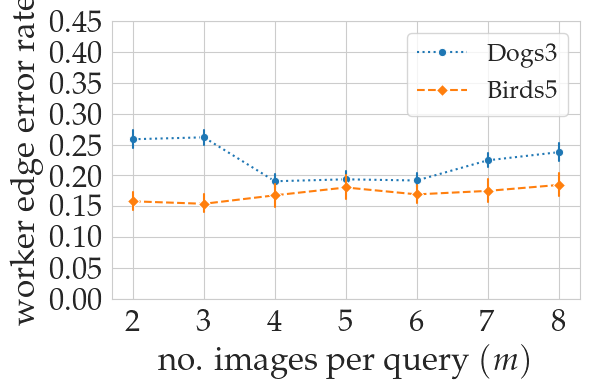

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

edge_error_df = pd.read_csv(f"./csv/edge_error_per_worker_dogs3_{mode}.csv")
edge_error_df["num_1_error_rate"] = 1 - edge_error_df["num_1_correct"] / edge_error_df["num_1"]
edge_error_df["num_0_error_rate"] = 1 - edge_error_df["num_0_correct"] / edge_error_df["num_0"]
edge_error_df["edge_error_rate"] = 1 - edge_error_df["num_correct_edges"] / edge_error_df["num_edges"]
sns.lineplot(data=edge_error_df, x="num_images_per_question", y="edge_error_rate", err_style="bars", ax=ax, markers=True, marker='o', label='Dogs3', linestyle='dotted')

edge_error_df = pd.read_csv(f"./csv/edge_error_per_worker_birds5_{mode}.csv")
edge_error_df["num_1_error_rate"] = 1 - edge_error_df["num_1_correct"] / edge_error_df["num_1"]
edge_error_df["num_0_error_rate"] = 1 - edge_error_df["num_0_correct"] / edge_error_df["num_0"]
edge_error_df["edge_error_rate"] = 1 - edge_error_df["num_correct_edges"] / edge_error_df["num_edges"]
sns.lineplot(data=edge_error_df, x="num_images_per_question", y="edge_error_rate", err_style="bars", ax=ax, markers=True, marker='D', label='Birds5', linestyle='dashed')

ax.set_xticks([2, 3, 4, 5, 6, 7, 8])
ax.set_yticks(np.arange(0, 0.5, 0.05))
ax.set_xlabel(r'no. images per query $(m)$', fontsize=label_size)
ax.set_ylabel('worker edge error rate', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.legend(fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"./plots/worker_edge_error_rate_{mode}.png", dpi=300,
            facecolor='white', transparent=False)
plt.show()

fig = sns.boxplot(
    data=edge_error_df, x="num_images_per_question", y="edge_error_rate")
fig.set_title(f"Worker edge error rate, $n=145$, {dataset_name}")
fig.set_xlabel("Number of images per question")
fig.set_ylabel("Worker edge error rate")
plt.savefig(f"./plots/worker_edge_error_rate_boxplot_{dataset_name}.png", dpi=300,
            facecolor='white', transparent=False)
plt.show()


# VI

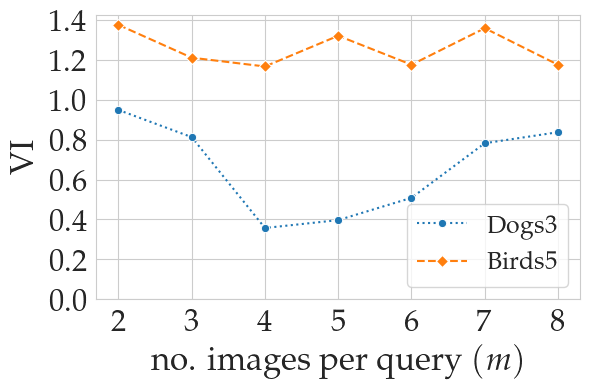

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

vi_df = pd.read_csv(f"./csv/vi_{mode}.csv")
vi_df = vi_df[vi_df.dataset == 'dogs3']
sns.lineplot(data=vi_df, x="num", y="vi", err_style="bars", ax=ax, markers=True, marker='o', label='Dogs3', linestyle='dotted')

vi_df = pd.read_csv(f"./csv/vi_{mode}.csv")
vi_df = vi_df[vi_df.dataset == 'birds5']
sns.lineplot(data=vi_df, x="num", y="vi", err_style="bars", ax=ax, markers=True, marker='D', label='Birds5', linestyle='dashed')

ax.set_xticks([2, 3, 4, 5, 6, 7, 8])
ax.set_yticks(np.arange(0, 1.6, 0.2))
ax.set_xlabel(r'no. images per query $(m)$', fontsize=label_size)
ax.set_ylabel(r'$\mathrm{VI}$', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)

ax.legend(fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"./plots/VI_{mode}.png", dpi=300,
            facecolor='white', transparent=False)
plt.show()

# Number of Edges

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

vi_df = pd.read_csv(f"./csv/vi_{mode}.csv")
vi_df = vi_df[vi_df.dataset == 'dogs3']
sns.lineplot(data=vi_df, x="num", y="vi", err_style="bars", ax=ax,
             markers=True, marker='o', label='Dogs3', linestyle='dotted')

vi_df = pd.read_csv(f"./csv/vi_{mode}.csv")
vi_df = vi_df[vi_df.dataset == 'birds5']
sns.lineplot(data=vi_df, x="num", y="vi", err_style="bars", ax=ax,
             markers=True, marker='D', label='Birds5', linestyle='dashed')

ax.set_xticks([2, 3, 4, 5, 6, 7, 8])
ax.set_yticks(np.arange(0, 1.6, 0.2))
ax.set_xlabel(r'no. images per query $(m)$', fontsize=label_size)
ax.set_ylabel(r'$\mathrm{VI}$', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)

ax.legend(fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"./plots/VI_{mode}.png", dpi=300,
            facecolor='white', transparent=False)
plt.show()
